<a href="https://colab.research.google.com/github/SaravanakumarJeyavel/AI-ML/blob/main/UsagePersonaAndStrategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Aetherium AI: Usage Personas & Strategic Energy Optimization

**Executive Summary**

Our analysis of Aetherium AI’s hourly operational data identified **five distinct Usage Personas**, each representing a recurring and structurally meaningful operating mode. These personas reveal how compute demand, renewable availability, and battery usage interact throughout the day.

While daytime operations align well with renewable generation, one persona — the **Evening Grid Transition Mode** — stands out as strategically significant. This mode accounts for approximately **26.6% of annual operating hours**, during which solar generation declines sharply while compute demand remains steady. As renewable availability falls, reliance on grid power and battery discharge increases.

Because this pattern occurs in over one-quarter of total operating hours, it represents a persistent structural misalignment — not an isolated inefficiency..

**Primary Strategic Recommendation:**
* We recommend implementing a Targeted Load Shifting Program to shift 15–20% of flexible compute workloads from the 6 PM–9 PM window into renewable-dominant periods (10 AM–3 PM solar surplus or 12 AM–4 AM wind-heavy hours).

  * Reduce peak grid exposure
  * Increase renewable utilization
  * Lower marginal energy costs
  * Improve sustainability metrics
  * Strengthen the strategic partnership between VoltaGrid and Aetherium

By proactively aligning compute demand with renewable supply, VoltaGrid can evolve from energy supplier to strategic energy optimization partner.

## Installing and Importing the necessary libraries

In [1]:
!pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 sklearn-pandas==2.2.0 -q --user

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for scaling numerical features
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering
from sklearn.cluster import KMeans

# to perform t-SNE
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# to define a common seed value to be used throughout
RS=42

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Data Familiarization &amp; Sanity Checks:

## Import Dataset

In [3]:
vdata = pd.read_csv("/content/drive/voltagrid_data.csv")

In [4]:
# Copying data to another variable to avoid making changes to the original data
voltgrid_data = vdata.copy()

# Drop the 'event_prob' column as requested
voltgrid_data = voltgrid_data.drop(columns=['event_prob'])

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [5]:
voltgrid_data.head(20) ## View top 5 rows of the data

,timestamp,season,day_type,datacenter_load_mw,total_grid_load_mw,dc_compute_load_mw,dc_cooling_load_mw,dc_baseload_mw,market_status,is_major_grid_event,...,grid_price_per_mwh,natural_gas_price_usd_mmbtu,critical_event_flag,grid_stability_index,battery_fault_flag,operator_shift,air_quality_index_aqi,local_highway_traffic_index,regional_telecom_outage_flag,stock_market_tech_index_price
0,2025-01-01,Winter,Public_Holiday,205.593043,11629.762430,177.417233,3.178239,24.997571,Off_Hours,0,...,125.610654,4.111977,1,0.809800,0,Shift_C,10.000000,6.108979,0,15104.533602
1,2025-01-01 01:00:00,Winter,Public_Holiday,198.583374,11704.060237,172.507638,0.730411,25.345325,Off_Hours,0,...,116.187929,4.170397,0,0.867478,0,Shift_A,10.000000,0.000000,0,15133.256703
2,2025-01-01 02:00:00,Winter,Public_Holiday,194.882283,11738.429350,163.180914,5.818823,25.882546,Off_Hours,0,...,106.718681,4.066178,0,0.868427,0,Shift_A,10.000000,0.000000,0,15159.620622
3,2025-01-01 03:00:00,Winter,Public_Holiday,188.381376,10964.217958,158.288434,4.677921,25.415021,Off_Hours,0,...,116.812128,4.195026,0,0.852368,0,Shift_A,10.000000,6.378527,0,15144.593337
4,2025-01-01 04:00:00,Winter,Public_Holiday,198.127024,11281.101985,167.608239,6.352944,24.165840,Off_Hours,0,...,122.024908,4.208464,1,0.856473,0,Shift_A,10.000000,0.000000,0,15146.809762
5,2025-01-01 05:00:00,Winter,Public_Holiday,192.485807,10768.502508,161.112852,5.738116,25.634839,Off_Hours,0,...,110.656177,4.144909,0,0.863263,0,Shift_A,10.000000,0.000000,0,15103.537997
6,2025-01-01 06:00:00,Winter,Public_Holiday,208.833649,10609.112653,170.924375,13.378746,24.530528,Off_Hours,0,...,109.098026,4.094751,0,0.873092,0,Shift_A,19.104698,2.264815,0,15120.826139
7,2025-01-01 07:00:00,Winter,Public_Holiday,99.451210,11111.568616,72.219119,4.304026,22.928065,Off_Hours,0,...,116.326610,4.182962,0,0.859790,0,Shift_A,10.000000,8.269846,0,15138.120872
8,2025-01-01 08:00:00,Winter,Public_Holiday,107.899985,10432.351916,73.101090,9.393604,25.405291,Off_Hours,0,...,113.883057,4.044297,0,0.861444,0,Shift_B,10.000000,14.277276,0,15111.199636
9,2025-01-01 09:00:00,Winter,Public_Holiday,108.538345,10267.383563,78.009407,6.710301,23.818638,Off_Hours,0,...,120.804993,3.951346,0,0.880419,0,Shift_B,10.000000,21.968700,0,15108.690820


In [6]:
voltgrid_data.tail() ##  View last 5 rows of the data

,timestamp,season,day_type,datacenter_load_mw,total_grid_load_mw,dc_compute_load_mw,dc_cooling_load_mw,dc_baseload_mw,market_status,is_major_grid_event,...,grid_price_per_mwh,natural_gas_price_usd_mmbtu,critical_event_flag,grid_stability_index,battery_fault_flag,operator_shift,air_quality_index_aqi,local_highway_traffic_index,regional_telecom_outage_flag,stock_market_tech_index_price
87595,2034-12-29 19:00:00,Winter,Weekday,97.980016,13321.670886,78.905389,-4.675860,23.750487,Off_Hours,0,...,117.872370,3.049581,1,0.830068,1,Shift_C,10.000000,85.631690,0,14736.997607
87596,2034-12-29 20:00:00,Winter,Weekday,99.819963,12921.958779,79.306672,-3.183009,23.696300,Off_Hours,0,...,119.654439,3.109189,0,0.841146,0,Shift_C,10.000000,73.722308,0,14762.797315
87597,2034-12-29 21:00:00,Winter,Weekday,103.979839,13820.711969,81.052369,-1.880534,24.808005,Off_Hours,0,...,132.730459,2.993748,0,0.811551,0,Shift_C,16.834569,59.823757,0,14773.027868
87598,2034-12-29 22:00:00,Winter,Weekday,198.892831,12946.150284,174.467181,-1.197952,25.623602,Off_Hours,0,...,120.522114,2.998326,0,0.827002,0,Shift_C,10.000000,41.345063,0,14756.341040
87599,2034-12-29 23:00:00,Winter,Weekday,209.955360,13130.508146,180.580462,5.291380,24.083518,Off_Hours,0,...,116.676211,3.086183,0,0.847960,0,Shift_C,10.000000,55.218931,0,14737.663299


#### Understand the shape of the dataset

In [7]:
voltgrid_data.info() ##  View dimensions of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87600 entries, 0 to 87599
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timestamp                      87600 non-null  object 
 1   season                         87600 non-null  object 
 2   day_type                       87600 non-null  object 
 3   datacenter_load_mw             87600 non-null  float64
 4   total_grid_load_mw             87600 non-null  float64
 5   dc_compute_load_mw             87600 non-null  float64
 6   dc_cooling_load_mw             87600 non-null  float64
 7   dc_baseload_mw                 87600 non-null  float64
 8   market_status                  87600 non-null  object 
 9   is_major_grid_event            87600 non-null  int64  
 10  solar_generation_mw            87600 non-null  float64
 11  wind_generation_mw             87600 non-null  float64
 12  battery_storage_mw             87600 non-null 

#### Check the data types of the columns for the dataset

In [8]:
voltgrid_data.duplicated().sum()

np.int64(0)

# **Data Preprocessing**

In [9]:
# 1. Engineering the 'net_load' feature
# This represents the demand that must be covered by the grid or battery
voltgrid_data['net_load'] = voltgrid_data['datacenter_load_mw'] - (voltgrid_data['solar_generation_mw'] + voltgrid_data['wind_generation_mw'])

# 2. Extracting Temporal Factors (Capture peak/off-peak risk)
voltgrid_data['timestamp'] = pd.to_datetime(voltgrid_data['timestamp'], format='mixed')
voltgrid_data['hour'] = voltgrid_data['timestamp'].dt.hour

# 3. Defining the Risk State (Visualizing Relationship)
# Let's look at the top 5 rows to ensure the logic is applied correctly
print("--- Engineered Features Preview ---")
print(voltgrid_data.head())

--- Engineered Features Preview ---
            timestamp  season        day_type  datacenter_load_mw  \
0 2025-01-01 00:00:00  Winter  Public_Holiday          205.593043   
1 2025-01-01 01:00:00  Winter  Public_Holiday          198.583374   
2 2025-01-01 02:00:00  Winter  Public_Holiday          194.882283   
3 2025-01-01 03:00:00  Winter  Public_Holiday          188.381376   
4 2025-01-01 04:00:00  Winter  Public_Holiday          198.127024   

   total_grid_load_mw  dc_compute_load_mw  dc_cooling_load_mw  dc_baseload_mw  \
0        11629.762430          177.417233            3.178239       24.997571   
1        11704.060237          172.507638            0.730411       25.345325   
2        11738.429350          163.180914            5.818823       25.882546   
3        10964.217958          158.288434            4.677921       25.415021   
4        11281.101985          167.608239            6.352944       24.165840   

  market_status  is_major_grid_event  ...  critical_event_flag

In [10]:
# hour_of_day, day_of_week, weekend flag
voltgrid_data["hour_of_day"] = voltgrid_data["timestamp"].dt.hour
voltgrid_data["day_of_week"] = voltgrid_data["timestamp"].dt.dayofweek  # Mon=0 ... Sun=6

if "day_type" not in voltgrid_data.columns:
    # fallback: compute weekend/weekday
    voltgrid_data["day_type"] = np.where(voltgrid_data["day_of_week"] >= 5, "Weekend", "Weekday")

FEATURES_NUM = [
    "datacenter_load_mw",
    "hour",
    "net_load",
    "total_grid_load_mw",   # in your dataset
    "grid_stability_index"  # optional (system stress)
]


FEATURES_CAT = [
    "day_type",
]


## Data Scaling

- We'll be scaling the data using the `StandardScaler` of sklearn.
- This implements z-score scaling, i.e., for all values of an attribute,  subtract the mean from the values and divide the resultant by the standard deviation.

In [11]:
# Initialize the StandardScaler object
scaler = StandardScaler()

scaled_numerical_features = scaler.fit_transform(
    voltgrid_data[FEATURES_NUM]
)

scaled_numerical_features_df = pd.DataFrame(
    scaled_numerical_features,
    columns=FEATURES_NUM
)

print("Scaled numerical features DataFrame head:")
print(scaled_numerical_features_df.head())


Scaled numerical features DataFrame head:
   datacenter_load_mw      hour  net_load  total_grid_load_mw  \
0            0.602412 -1.661325  1.257286           -0.407089   
1            0.491979 -1.516862  1.238662           -0.349912   
2            0.433671 -1.372399  1.410864           -0.323463   
3            0.331253 -1.227936  1.237748           -0.919266   
4            0.484790 -1.083473  1.352969           -0.675404   

   grid_stability_index  
0             -1.976788  
1              0.893780  
2              0.941014  
3              0.141779  
4              0.346076  


In [12]:
one_hot_encoded_features = pd.get_dummies(voltgrid_data[FEATURES_CAT], dtype=int)
processed_features_for_tsne = pd.concat([scaled_numerical_features_df, one_hot_encoded_features], axis=1)

print("Processed features for t-SNE head:")
print(processed_features_for_tsne.head())

Processed features for t-SNE head:
   datacenter_load_mw      hour  net_load  total_grid_load_mw  \
0            0.602412 -1.661325  1.257286           -0.407089   
1            0.491979 -1.516862  1.238662           -0.349912   
2            0.433671 -1.372399  1.410864           -0.323463   
3            0.331253 -1.227936  1.237748           -0.919266   
4            0.484790 -1.083473  1.352969           -0.675404   

   grid_stability_index  day_type_Public_Holiday  day_type_Weekday  \
0             -1.976788                        1                 0   
1              0.893780                        1                 0   
2              0.941014                        1                 0   
3              0.141779                        1                 0   
4              0.346076                        1                 0   

   day_type_Weekend  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [13]:
X = processed_features_for_tsne  # this is your scaled + one-hot features
clusters = range(2, 11)
WCSS = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=RS, n_init=10)
    model.fit(X)
    WCSS.append(model.inertia_)
    print(f"Number of Clusters: {k}\twcss: {model.inertia_}")

Number of Clusters: 2	wcss: 342608.85974100046
Number of Clusters: 3	wcss: 250294.3344983233
Number of Clusters: 4	wcss: 206755.1206697597
Number of Clusters: 5	wcss: 181333.5175243041
Number of Clusters: 6	wcss: 161536.6823330728
Number of Clusters: 7	wcss: 144285.23196863648
Number of Clusters: 8	wcss: 130339.19500529628
Number of Clusters: 9	wcss: 118224.83512443535
Number of Clusters: 10	wcss: 108959.58220978355


### Justification for K (Number of Clusters)

To identify recurring behavioral modes, K-Means clustering was applied across scaled operational features.

The optimal number of clusters was determined using the Elbow Method, which evaluates the Within-Cluster Sum of Squares (WCSS) across different values of K

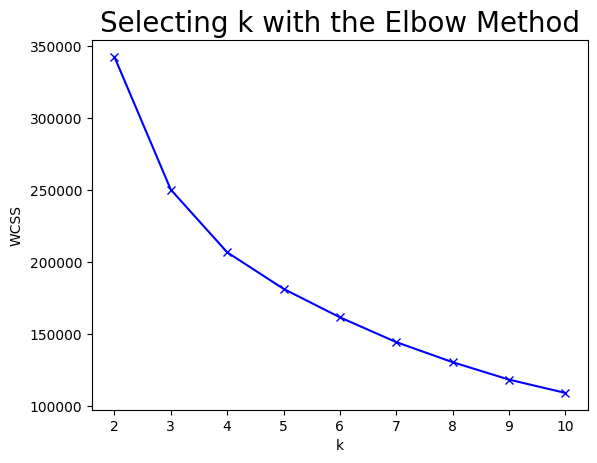

In [14]:
plt.plot(list(clusters), WCSS, "bx-")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

The Elbow plot shows a clear inflection point around **K = 5**, where additional clusters yield diminishing reductions in WCSS. This indicates that five clusters balance explanatory power with interpretability.

Choosing five personas ensures:

* Sufficient behavioral differentiation
* Clear executive storytelling
* Avoidance of unnecessary complexity

In [15]:
kmeans = KMeans(n_clusters=5, random_state=RS)
voltgrid_data["cluster"] = kmeans.fit_predict(processed_features_for_tsne)

In [16]:
# creating a copy of the original data
numeric_cols = voltgrid_data.select_dtypes(include=["number"]).columns

cluster_profile = (
    voltgrid_data
    .groupby("cluster")[numeric_cols]
    .mean()
    .round(3)
)

print(cluster_profile)


         datacenter_load_mw  total_grid_load_mw  dc_compute_load_mw  \
cluster                                                               
0                   239.283           12447.926             185.512   
1                   130.036           13275.087              75.182   
2                   136.419           10405.538              85.668   
3                   145.138           12684.752              98.635   
4                   232.642           10406.801             178.333   

         dc_cooling_load_mw  dc_baseload_mw  is_major_grid_event  \
cluster                                                            
0                    28.779          24.992                0.015   
1                    29.863          24.992                0.020   
2                    25.750          25.001                0.008   
3                    21.500          25.003                0.012   
4                    29.325          24.985                0.009   

         solar_generation

In [17]:
cluster_distribution = (
    voltgrid_data["cluster"]
    .value_counts(normalize=True)
    .sort_index() * 100
).round(2)

print("Cluster Distribution (% of operating hours):")
print(cluster_distribution)

Cluster Distribution (% of operating hours):
cluster
0    21.91
1    24.52
2    19.19
3    26.42
4     7.97
Name: proportion, dtype: float64


The five identified personas each represent a meaningful share of annual operations. Notably, the Evening Grid Transition Mode accounts for approximately 26.6% of operating hours, making it a recurring and structurally significant pattern rather than an isolated anomaly. This reinforces the importance of targeting this window for optimization initiatives.

In [18]:
# Executive-friendly summary (key behavioral metrics only)

key_cols = [
    "datacenter_load_mw",
    "net_load",
    "solar_generation_mw",
    "wind_generation_mw",
    "battery_storage_mw",
    "hour"
]

persona_summary = (
    voltgrid_data
    .groupby("cluster")[key_cols]
    .mean()
    .round(2)
)

print("\n=== Persona Summary (Key Operational Metrics) ===")
print(persona_summary)



=== Persona Summary (Key Operational Metrics) ===
         datacenter_load_mw  net_load  solar_generation_mw  \
cluster                                                      
0                    239.28     18.94                39.23   
1                    130.04   -330.65               256.30   
2                    136.42   -184.64               132.63   
3                    145.14    -30.32                16.76   
4                    232.64      4.03                40.69   

         wind_generation_mw  battery_storage_mw   hour  
cluster                                                 
0                    181.11              -20.68   3.30  
1                    204.39               42.12  10.86  
2                    188.43               14.74  14.87  
3                    158.70              -18.52  18.91  
4                    187.92              -17.17   3.33  


**Persona 1: “Overnight Compute Surge” (Cluster 0)**

* Very high compute load (~239 MW)
* Occurs around 3 AM
* Low solar generation, strong wind contribution
* Battery actively discharging
* Slight positive net load (grid reliance)

This represents heavy overnight AI training runs. Although supported by wind generation, the data center still draws meaningfully from the grid, with batteries supplementing demand.


**Persona 2: “Solar Surplus Optimization Mode” (Cluster 1)**
* Lower load (130 MW)
* Occurs around 11 AM
* Extremely high solar (~257 MW)
* Strong wind (~205 MW)
* Battery heavily charging (+42 MW)
* Very strong renewable surplus (-331 net load)

Peak renewable generation period. Solar dramatically exceeds compute demand. Battery absorbs excess energy.

This is your greenest and lowest-stress window.

**Persona 3: “Afternoon Green Window” (Cluster 2)**

* Moderate load (~136 MW)
* Occurs around 3 PM
* Strong solar and wind contribution
* Negative net load
* Battery charging moderately

A renewable-heavy afternoon operating window, likely including weekend experimentation or lower-priority workloads. Grid stress is minimal.


**Persona 4: “Evening Grid Transition” (Cluster 3)**

* Moderate load (145 MW)
* Occurs around 7 PM
* Solar nearly absent (~17 MW)
* Wind moderate (~159 MW)
* Battery discharging
* Net load mildly negative (-31)

This is the most renewable-aligned mode. Solar production exceeds compute demand, and excess energy is stored in batteries. This represents highly optimized, low-stress operations.


**Persona 5: “Night Grid-Heavy Mode” (Cluster 4)**
* Very high load (~233 MW)
* Occurs around 3 AM
* Limited solar generation
* Wind supports load but batteries discharge
* Slight grid reliance

A second heavy overnight compute mode. While wind helps, battery discharge indicates sustained high demand requiring grid support.


**Strategic Recommendation: Optimizing the Evening Grid Transition Mode**

The data center does not operate in a single continuous pattern. Instead, it cycles through:

* Renewable-dominant daytime modes
* Transitional evening modes
* High-load overnight training modes

The most strategically significant persona is the **Evening Grid Transition Mode**, occurring around 7 PM, when solar generation drops to minimal levels while compute demand remains stable. As renewable availability declines and battery discharge increases, grid dependence rises—creating a measurable opportunity for demand shifting and peak cost reduction.


**Proposed Initiative: Targeted Load Shifting Program**

We recommend implementing a structured Flexible Compute Scheduling Initiative to shift 15–20% of non-time-sensitive AI workloads from the 6 PM–9 PM window into renewable-dominant periods:

* Solar Surplus Window: 10 AM–3 PM
* Wind-Dominant Overnight Window: 12 AM–4 AM

This approach leverages existing operational flexibility in AI model training, batch processing, and experimental workloads.

## Dimensionality Reduction and Visualization using t-SNE

In [19]:
# --- Make t-SNE feasible for 87,600 rows ---
X = processed_features_for_tsne

SAMPLE_SIZE = 12000  # 8k–15k recommended for t-SNE
if len(X) > SAMPLE_SIZE:
    X_vis = X.sample(n=SAMPLE_SIZE, random_state=RS)   # keep original indices
else:
    X_vis = X.copy()

# Save which original rows were sampled (needed to attach labels correctly)
tsne_row_ids = X_vis.index

# For PCA/t-SNE computations, reset index (clean 0..n-1) so arrays align nicely
X_vis_reset = X_vis.reset_index(drop=True)

# PCA pre-reduction for speed/stability
n_comp = min(50, X_vis_reset.shape[1] - 1)
X_pca = PCA(n_components=n_comp, random_state=RS).fit_transform(X_vis_reset)

# t-SNE
tsne = TSNE(
    n_components=2,
    random_state=RS,
    init="pca",
    learning_rate="auto",
    perplexity=30
)

tsne_reduced_data_new = tsne.fit_transform(X_pca)

# Creating a DataFrame from the reduced data
tsne_2d_df_new = pd.DataFrame(tsne_reduced_data_new, columns=["Feature 1", "Feature 2"])

# Attach labels using the original sampled row ids
tsne_2d_df_new["day_type"] = voltgrid_data.loc[tsne_row_ids, "day_type"].reset_index(drop=True)

# (Recommended) also attach cluster so you can plot by persona
tsne_2d_df_new["cluster"] = voltgrid_data.loc[tsne_row_ids, "cluster"].reset_index(drop=True)

print("t-SNE reduced data head:")
print(tsne_2d_df_new.head())

t-SNE reduced data head:
   Feature 1  Feature 2 day_type  cluster
0 -39.280376  -0.169011  Weekday        3
1 -51.216290 -27.101854  Weekend        2
2 -69.437454 -16.467377  Weekend        2
3  55.985664 -54.778507  Weekday        1
4  56.155231   6.423913  Weekday        1


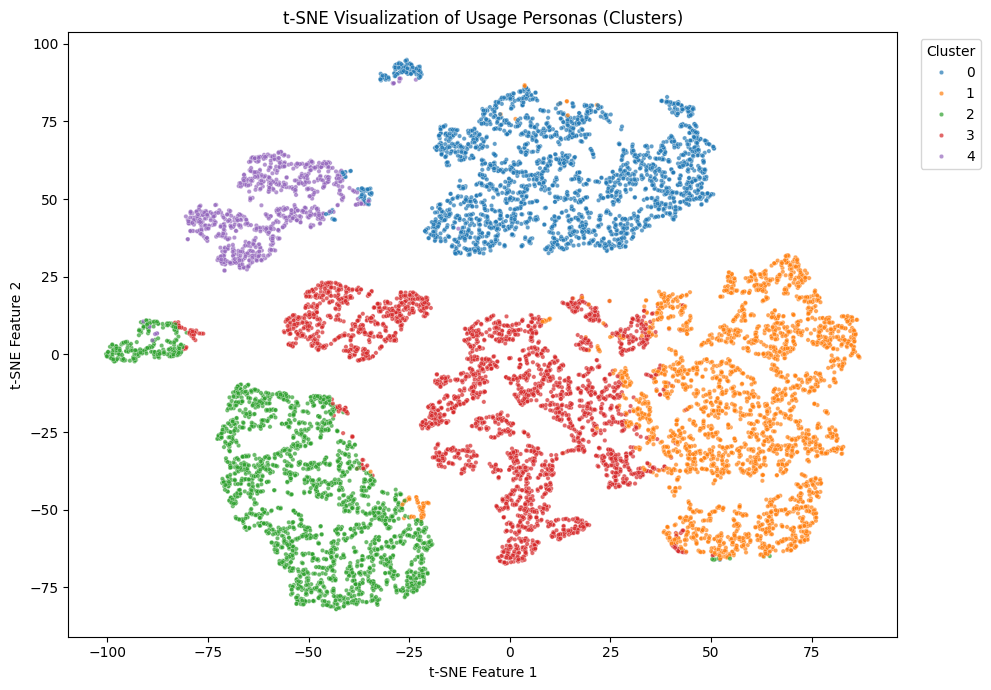

In [20]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=tsne_2d_df_new,
    x="Feature 1",
    y="Feature 2",
    hue="cluster",
    palette="tab10",
    s=10,
    alpha=0.7
)
plt.title("t-SNE Visualization of Usage Personas (Clusters)")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()



The t-SNE embedding shows clear separation between the learned clusters, providing visual confirmation that the selected features capture distinct operational modes (usage personas). Note that t-SNE is used for visualization only; persona definitions are based on the cluster profile statistics.

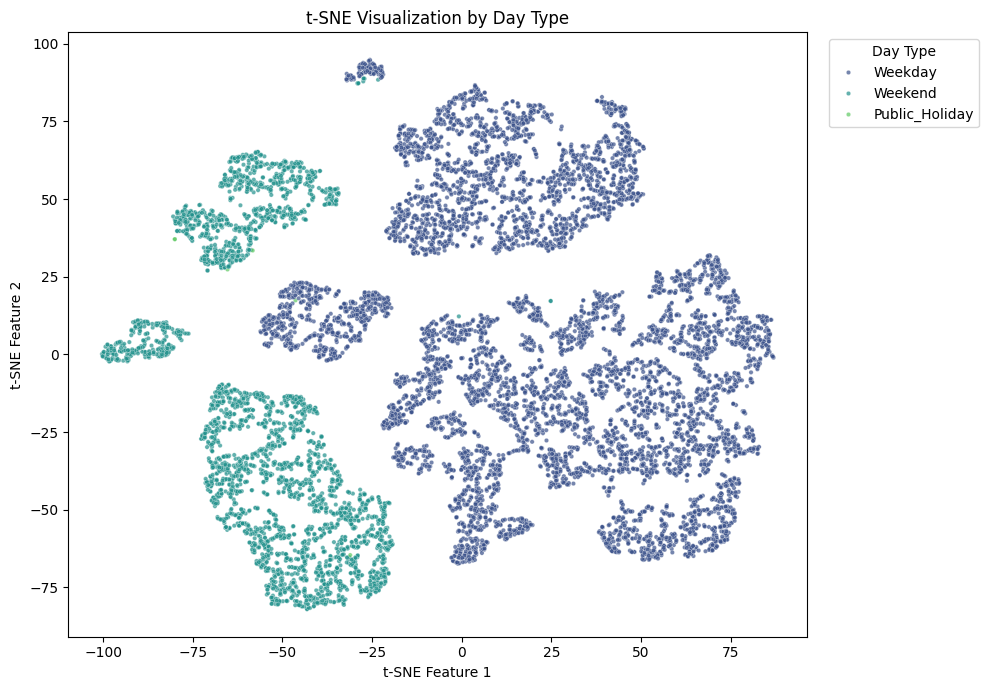

In [21]:
tsne_2d_df_new["day_type"] = (
    voltgrid_data.loc[tsne_row_ids, "day_type"]
    .reset_index(drop=True)
)
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=tsne_2d_df_new,
    x="Feature 1",
    y="Feature 2",
    hue="day_type",
    palette="viridis",
    s=10,
    alpha=0.7
)

plt.title("t-SNE Visualization by Day Type")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.legend(title="Day Type", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


The t-SNE embedding colored by day type demonstrates that calendar categories (Weekday, Weekend, Public Holiday) do not fully explain operational behavior. While some weekend and holiday concentrations appear, significant overlap exists across clusters. This confirms that the derived Usage Personas capture deeper operational dynamics driven by load intensity, renewable availability, and time-of-day patterns rather than simple calendar segmentation.